In [2]:
import matplotlib.pyplot as plt


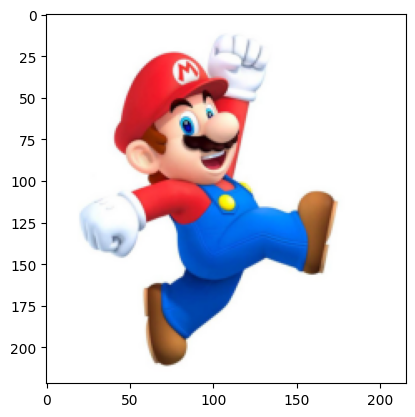

In [3]:

input_image=plt.imread("C:/Users/tusha/OneDrive/Documents/python/mario.png")
plt.imshow(input_image)

Using plt.imread to read input image

In [4]:
def grayscale(input_image):
    r,g,b = input_image[:,:,0], input_image[:,:,1], input_image[:,:,2]
    image_out = r*0.299 +g*0.587 +b*0.114
    return image_out

Converting to grayscale as it retains edge information and its more efficient to work with a single channel. 

In [5]:
gray=grayscale(input_image)
print(gray.shape)

(222, 216)


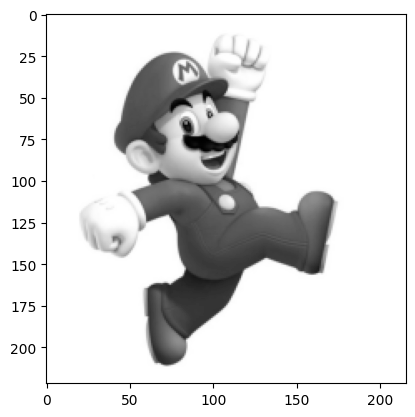

In [6]:
plt.imshow(gray, cmap="gray")

In [7]:
import numpy as np


In [8]:
def convolve(input,kernel,pad):
    (m,n)=input.shape
    (k,k)=kernel.shape
    conv=np.zeros((m,n))
    a=np.pad(input,pad_width=pad,mode='constant')
    for i in range(1,m-1):
        for j in range(1,n-1):
            reg=a[i-1:i+2,j-1:j+2]
            val=np.sum(reg*kernel)
            conv[i-1,j-1]=val
    return conv

Function defined for convolution operation, padding is considered to retain border information

In [9]:
sobel1=np.array([[1,0,-1],
                [2,0,-2],
                [1,0,-1]
                ])

sobel2=np.array([[1,2,1],
                 [0,0,0],
                 [-1,-2,-1]])


print(sobel1)
print(sobel2)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


This is the sobel operator for edge detection. It computes partial derivative in x and y direction. 

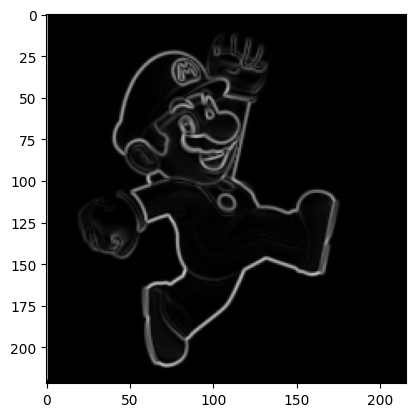

In [10]:
res1=convolve(gray,sobel1,1)
res2=convolve(gray,sobel2,1)

result=(res1**2+res2**2)**0.5

plt.imshow(result,cmap="gray")


After convolution with sobel1 and sobel2 , we have to do add their squares under root to get the magnitude of first order derivatibe

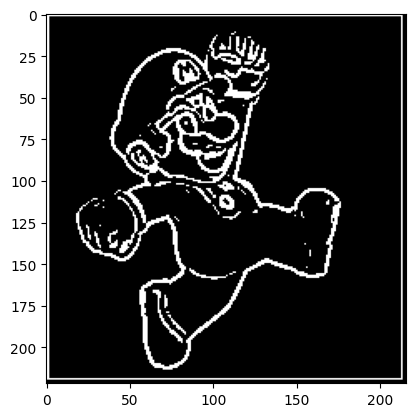

In [15]:
blur=np.array([[1,2,1],
               [2,4,2],
               [1,2,1]])

gray1=convolve(gray,blur,1)

lap2=np.array([[0,-1,0],
              [-1,4,-1],
               [0,-1,0]])

re1=convolve(gray1,lap2,1)
threshold=0.3
edge=(re1>threshold)*255
plt.imshow(edge,cmap="gray")





Laplacian method, we calculate the second order derivatives. This method is very sensitive to noise in the image so we apply Gauss blur filter to reduce noise. Then convolve with laplacian filter. Here, the edges are mapped to zero and theres a sharp zero crossing around egdes, so to identify edges we have to identify the crossings. This is done by the use of a threshold.

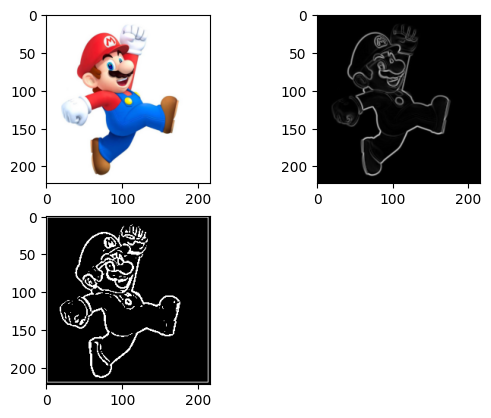

In [16]:
plt.subplot(2,2,1)
img1=input_image
plt.imshow(img1)
plt.subplot(2,2,2)
plt.imshow(result,cmap="gray")
plt.subplot(2,2,3)
plt.imshow(edge,cmap="gray")
